#### Implementation of InceptionResNetV2 for classification of skin lesions using the MNIST-HAM10000 Dataset.
- Date : January 30th 2024
- Author : Aarya Bhave
- Project : Skin_Cancer_Diagnosis
  
This code carries out preprocessing on the metadata for classification of seven types of skin lesions.  
Before running this file locally, you must have Tensorflow-GPU installed with a dedicated GPU.

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import tensorflow as tf 
import keras as K
from PIL import Image

In [7]:
meta_data = pd.read_csv('HAM10000_metadata.csv')
meta_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


##### Basic Description

In [8]:
meta_data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [22]:
h5_model = tf.keras.models.load_model('InceptionResNetV2_H5.h5')

2024-02-12 14:18:57.397313: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 14:18:57.577488: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 14:18:57.577944: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

##### Adding Model Predictions

In [9]:
res_list = []
dir_path = "all_images/"
image_id_list = meta_data['image_id'].to_list()
len(image_id_list)
for id in image_id_list:
    img_path = dir_path + id + '.jpg'
    img = Image.open(img_path)
    img.resize((224, 224))
    numpy_data = np.asarray(img)
    numpy_data = numpy_data.reshape(1, 224, 224, 3)
    


FileNotFoundError: [Errno 2] No such file or directory: 'all_images/ISIC_0027419'

##### Train-Test-Split

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(meta_data, meta_data[['dx']]):
    strat_train_split = meta_data.loc[train_indices]
    strat_test_split = meta_data.loc[test_indices]

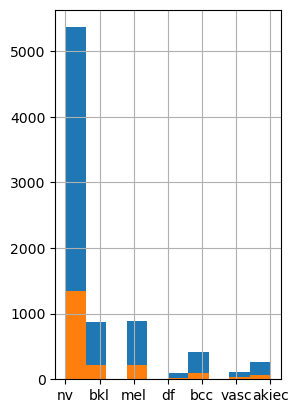

In [6]:
plt.subplot(1, 2, 1)
strat_train_split['dx'].hist()
strat_test_split['dx'].hist()
plt.show()

In [7]:
strat_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8012 entries, 8792 to 293
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     8012 non-null   object 
 1   image_id      8012 non-null   object 
 2   dx            8012 non-null   object 
 3   dx_type       8012 non-null   object 
 4   age           7965 non-null   float64
 5   sex           8012 non-null   object 
 6   localization  8012 non-null   object 
dtypes: float64(1), object(6)
memory usage: 500.8+ KB


In [8]:
strat_test_split.info()
meta_data['sex'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 2003 entries, 330 to 897
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     2003 non-null   object 
 1   image_id      2003 non-null   object 
 2   dx            2003 non-null   object 
 3   dx_type       2003 non-null   object 
 4   age           1993 non-null   float64
 5   sex           2003 non-null   object 
 6   localization  2003 non-null   object 
dtypes: float64(1), object(6)
memory usage: 125.2+ KB


array(['male', 'female', 'unknown'], dtype=object)

##### **Preprocessing Pipeline**
- Age Imputation
- Sex Imputation
- One hot encoder
- Feature Dropper
